In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Needed for EDA in Google colab
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import Required Packages for EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
df = pd.read_csv('/content/gdrive/MyDrive/capstone/annotations.xml')

In [ ]:
df.head(5)

,"<?xml version=""1.0"" encoding=""utf-8""?>"
0,<annotations>
1,<version>1.1</version>
2,<meta>
3,<task>
4,<mode>interpolation</mode>


In [ ]:
df.tail(5)

,"<?xml version=""1.0"" encoding=""utf-8""?>"
19430,</box>
19431,"<box frame=""119"" outside=""1"" occluded=""0"" ..."
19432,</box>
19433,</track>
19434,</annotations>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19435 entries, 0 to 19434
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   <?xml version="1.0" encoding="utf-8"?>  19435 non-null  object
dtypes: object(1)
memory usage: 152.0+ KB


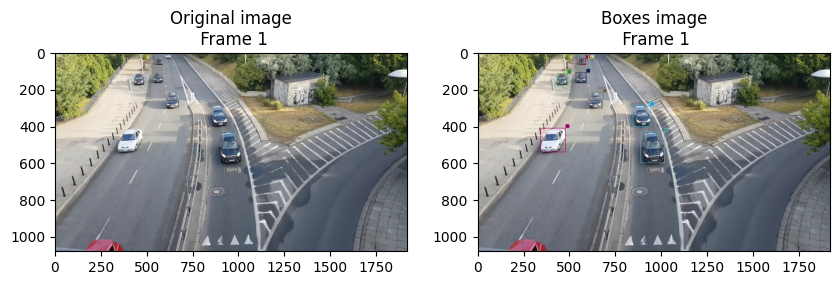

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/capstone/images/frame_000000.PNG'
img_1 = cv2.imread(img_path_1)

if img_1 is None:
    print(f"Error: Unable to load image from {img_path_1}")
else:
    img_path_2 = '/content/drive/MyDrive/capstone/boxes/frame_000000.PNG'
    img_2 = cv2.imread(img_path_2)

    # Display original images
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
    plt.title('Original image\n Frame 1')

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
    plt.title('Boxes image\n Frame 1')

    plt.show()





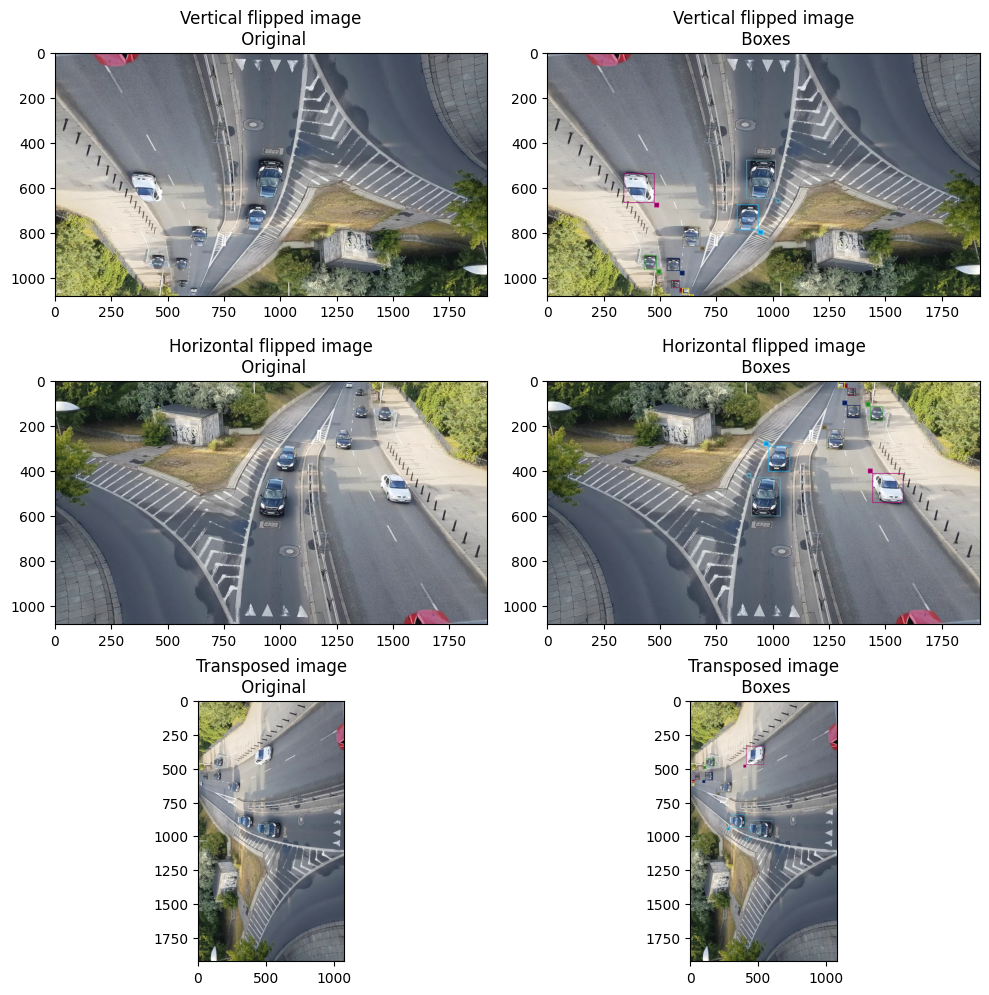

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/capstone/images/frame_000000.PNG'
img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/capstone/boxes/frame_000000.PNG'
img_2 = cv2.imread(img_path_2)

# Basic image manipulation (rotating/flipping/transpose)
flip_img_v1 = cv2.flip(img_1, 0)  # vertical flip
flip_img_v2 = cv2.flip(img_2, 0)  # vertical flip
# horizontal flip
flip_img_h1 = cv2.flip(img_1, 1)  # horizontal flip
flip_img_h2 = cv2.flip(img_2, 1)  # horizontal flip
# transpose
transp_img_1 = cv2.transpose(img_1)  # transpose
transp_img_2 = cv2.transpose(img_2)  # transpose

plt.figure(figsize=(10, 10))
plt.subplot(321)
plt.imshow(cv2.cvtColor(flip_img_v1, cv2.COLOR_BGR2RGB))
plt.title('Vertical flipped image\n Original')
plt.subplot(322)
plt.imshow(cv2.cvtColor(flip_img_v2, cv2.COLOR_BGR2RGB))
plt.title('Vertical flipped image\n Boxes')
plt.subplot(323)
plt.imshow(cv2.cvtColor(flip_img_h1, cv2.COLOR_BGR2RGB))
plt.title('Horizontal flipped image\n Original')
plt.subplot(324)
plt.imshow(cv2.cvtColor(flip_img_h2, cv2.COLOR_BGR2RGB))
plt.title('Horizontal flipped image\n Boxes')
plt.subplot(325)
plt.imshow(cv2.cvtColor(transp_img_1, cv2.COLOR_BGR2RGB))
plt.title('Transposed image\n Original')
plt.subplot(326)
plt.imshow(cv2.cvtColor(transp_img_2, cv2.COLOR_BGR2RGB))
plt.title('Transposed image\n Boxes')

plt.tight_layout()
plt.show()


<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  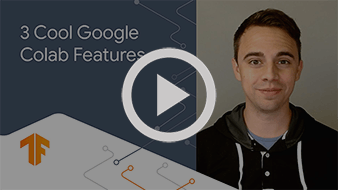
  </a>
</center>

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.restoration
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/capstone/images/frame_000000.PNG'
img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/capstone/boxes/frame_000000.PNG'
img_2 = cv2.imread(img_path_2)

# Gray scale conversion
img_1_gray = skic.rgb2gray(img_1)
img_2_gray = skic.rgb2gray(img_2)

# Adding Gaussian noise and denoising using denoise_tv_bregman approach for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)
img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)

# Noise reduction using Gaussian Blur
d = 3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d, d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d, d:-d]
img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d, d:-d]
img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d, d:-d]

plt.figure(figsize=(10, 10))

# Visualising Gray scale images visualization
plt.subplot(341), plt.imshow(img_1), plt.title('Original image\n Formula 1 ')
plt.subplot(342), plt.imshow(img_1_gray, cmap='gray'), plt.title('Gray Scale image\n Frame 1')
plt.subplot(343), plt.imshow(img_2), plt.title('Original image\n ')
plt.subplot(344), plt.imshow(img_2_gray, cmap='gray'), plt.title('Gray Scale image\n Frame 2')

# Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(img_1_n, cmap='gray'), plt.title('Noise added image\n Original')
plt.subplot(346), plt.imshow(img_1_d, cmap='gray'), plt.title('Denoised image\n Original')
plt.subplot(347), plt.imshow(img_2_n, cmap='gray'), plt.title('Noise added image\n Boxes')
plt.subplot(348), plt.imshow(img_2_d, cmap='gray'), plt.title('Denoised image\n Boxes')

# Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(img_1_blur3, cmap='gray'), plt.title('Blurred image (d=3)\n Original')
plt.subplot(3, 4, 10), plt.imshow(img_2_blur3, cmap='gray'), plt.title('Blurred image (d=3)\n Boxes')
plt.subplot(3, 4, 11), plt.imshow(img_1_blur6, cmap='gray'), plt.title('Blurred image (d=6)\n Original')
plt.subplot(3, 4, 12), plt.imshow(img_2_blur6, cmap='gray'), plt.title('Blurred image (d=6)\n Boxes')

plt.tight_layout()
plt.show()


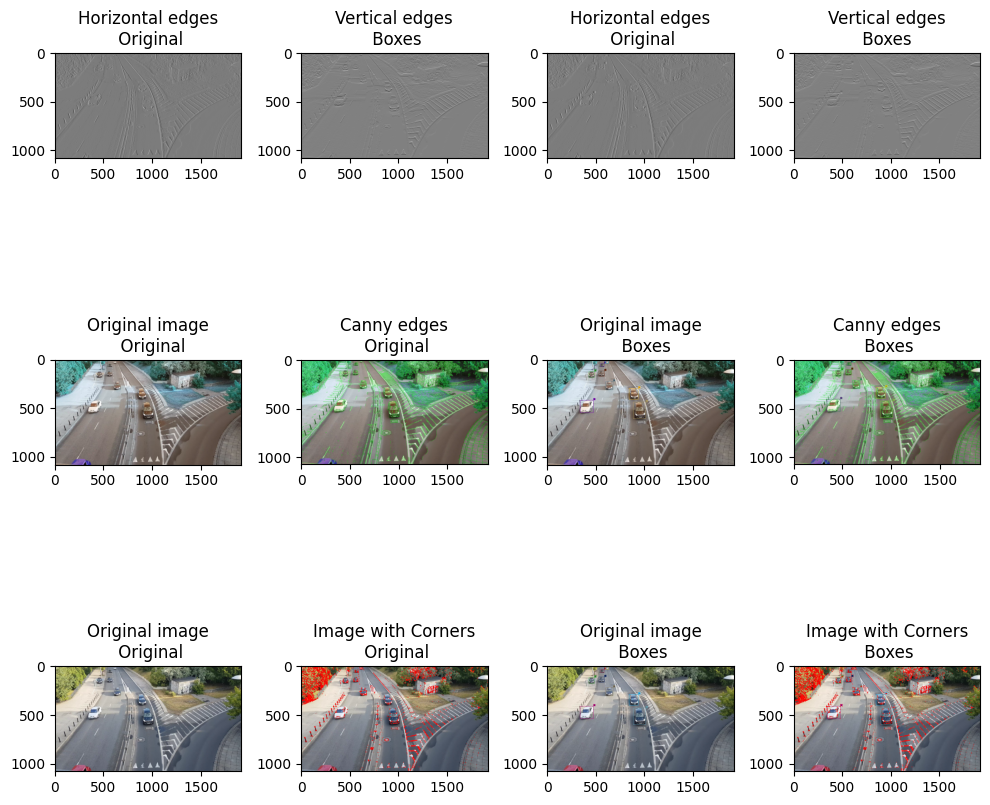

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path_1 = '/content/drive/MyDrive/capstone/images/frame_000000.PNG'
img_path_2 = '/content/drive/MyDrive/capstone/boxes/frame_000000.PNG'

img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

# Sobel edge detector
sobel_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
sobel_img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1, cv2.CV_64F, 1, 0, ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1, cv2.CV_64F, 0, 1, ksize=9)
sobelx_img_2 = cv2.Sobel(sobel_img_2, cv2.CV_64F, 1, 0, ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2, cv2.CV_64F, 0, 1, ksize=9)

# Canny edge detector
th1 = 30
th2 = 60
d = 3
edgeresult_1 = img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2 * d + 1, 2 * d + 1), -1)[d:-d, d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2 = img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2 * d + 1, 2 * d + 1), -1)[d:-d, d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

# Corner detector
def detect_corners(image):
    harris = image.copy()
    gray = cv2.cvtColor(harris, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    blocksize = 4
    kernel_size = 3
    dst = cv2.cornerHarris(gray, blocksize, kernel_size, 0.05)
    dst = cv2.dilate(dst, None)
    harris[dst > 0.01 * dst.max()] = [0, 0, 255]
    return harris

harris_1 = detect_corners(img_1)
harris_2 = detect_corners(img_2)

# Visualizing Edges and Corners
plt.figure(figsize=(10, 10))

# Visualizing Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap='gray'), plt.title('Horizontal edges\n Original')
plt.subplot(342), plt.imshow(sobely_img_1, cmap='gray'), plt.title('Vertical edges\n Boxes')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap='gray'), plt.title('Horizontal edges\n Original')
plt.subplot(344), plt.imshow(sobely_img_2, cmap='gray'), plt.title('Vertical edges\n Boxes ')

# Visualizing Canny Edges
plt.subplot(345), plt.imshow(img_1), plt.title('Original image\n  Original')
plt.subplot(346), plt.imshow(edgeresult_1, cmap='gray'), plt.title('Canny edges\n Original')
plt.subplot(347), plt.imshow(img_2), plt.title('Original image\n  Boxes')
plt.subplot(348), plt.imshow(edgeresult_2, cmap='gray'), plt.title('Canny edges\n Boxes')

# Visualizing Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)), plt.title('Original image\n Original')
plt.subplot(3, 4, 10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)), plt.title('Image with Corners\n Original')
plt.subplot(3, 4, 11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)), plt.title('Original image\n Boxes')
plt.subplot(3, 4, 12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)), plt.title('Image with Corners\n Boxes')

plt.tight_layout()
plt.show()



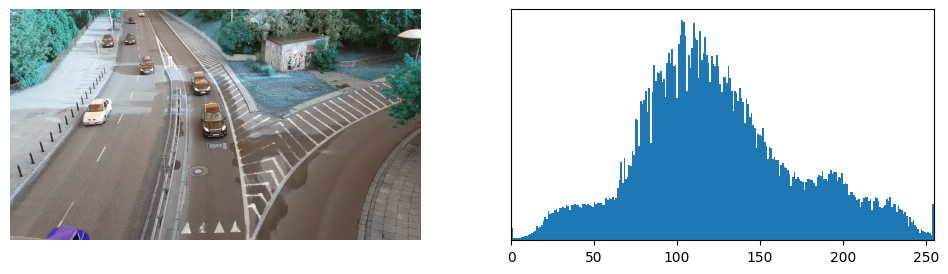

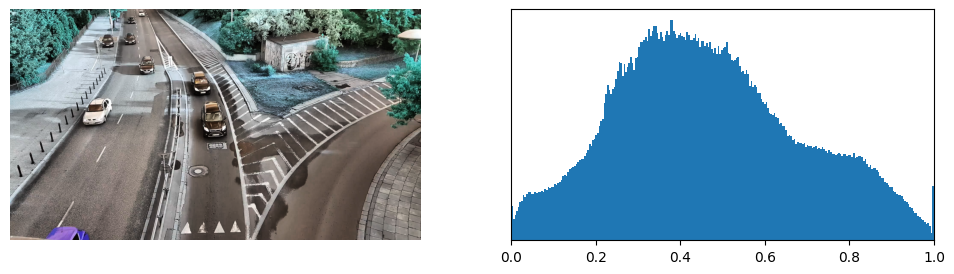

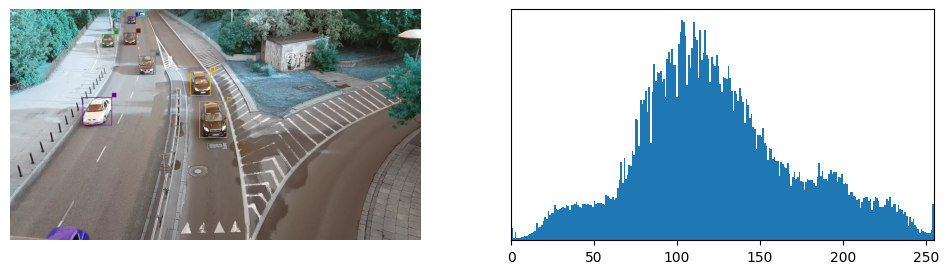

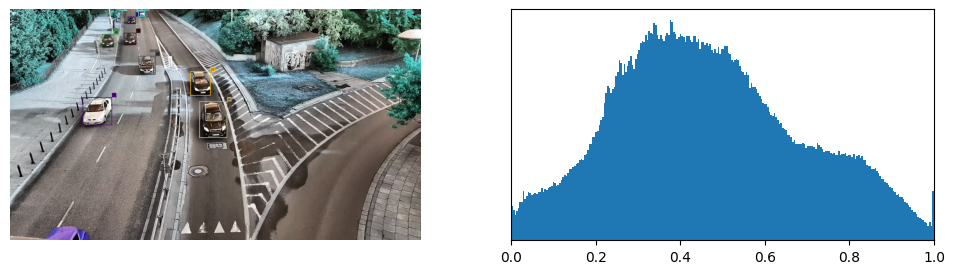

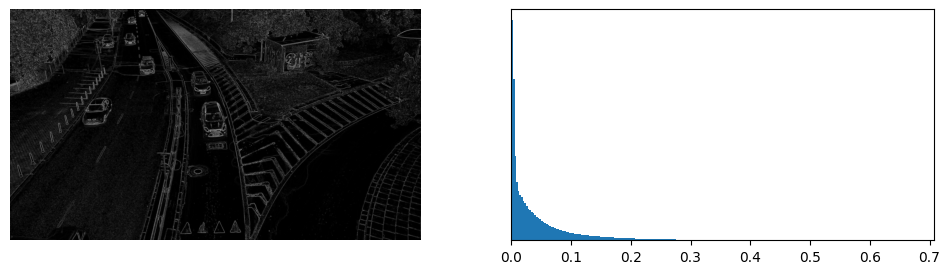

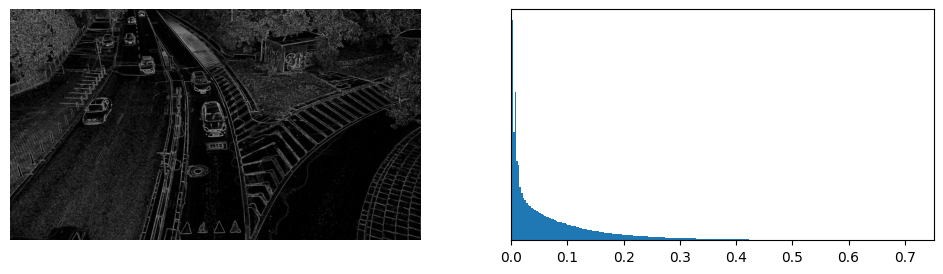

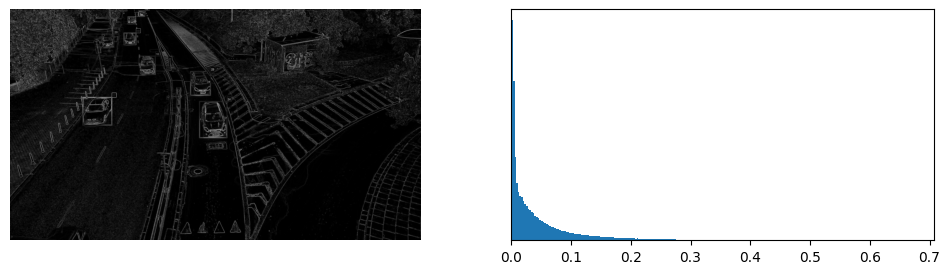

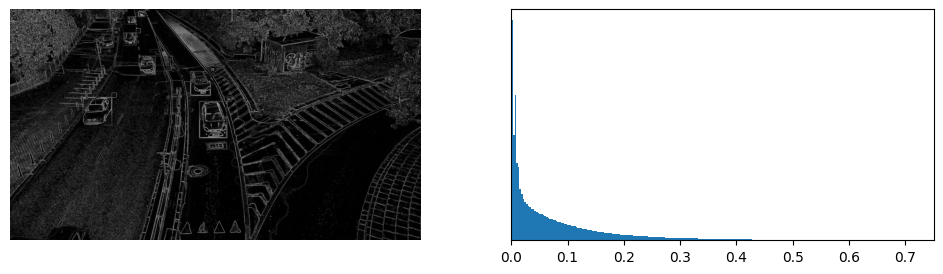

In [ ]:
# Q5 EDA: How discriminative are the images from different categories in terms of illumination and lighting artefacts
# i.e. what is the impact of camera effects/exposure of an image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/capstone/images/frame_000000.PNG'
img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/capstone/boxes/frame_000000.PNG'
img_2 = cv2.imread(img_path_2)

def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()
    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()

show(img_1)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_1))
show(img_2)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_2))

# class 1 image
img = skic.rgb2gray(img_1)
sobimg_nheq = skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)

# class 2 image
img = skic.rgb2gray(img_2)
sobimg_nheq = skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)


images 1


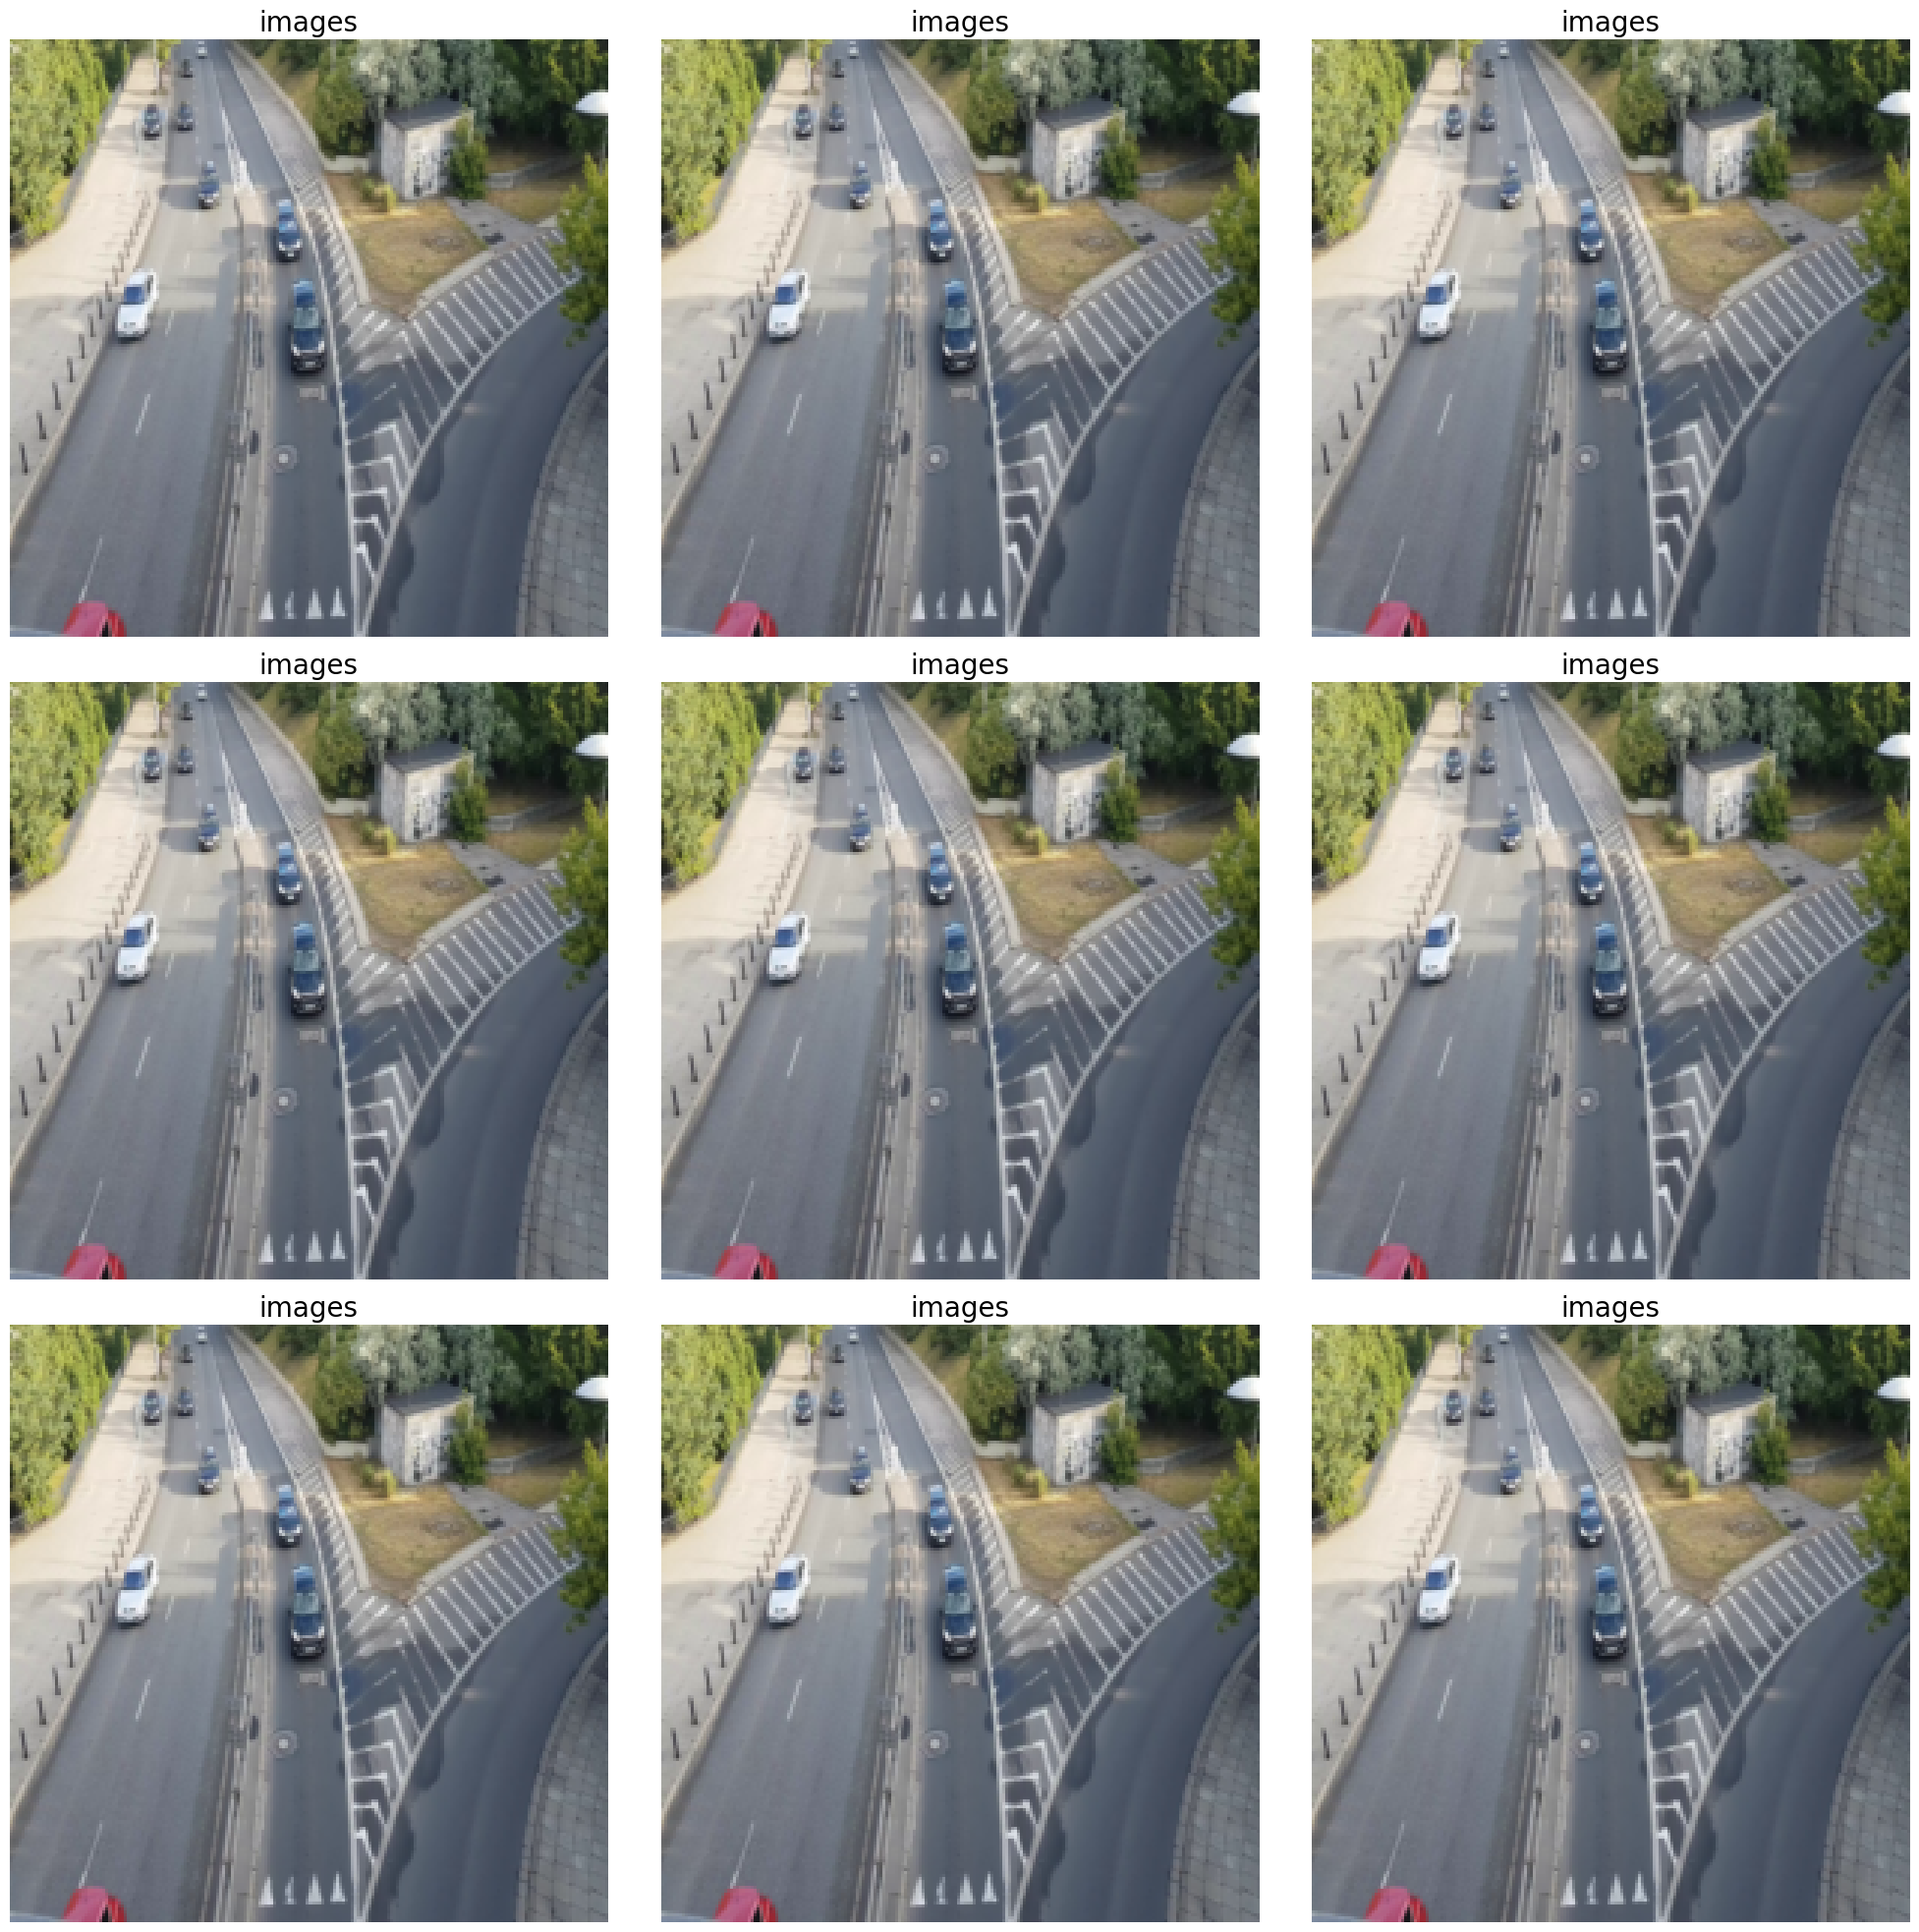

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import glob

images = []
X, y = [], []
ppc = 16
sz = 200
img_path = '/content/drive/MyDrive/capstone/images/frame_000000.PNG'

image_files = glob.glob(img_path)
label = img_path.split('/')[-2]  # Extracting label from the path

print(label, len(image_files))

for image_file in image_files:
    image = resize(imread(image_file), (sz, sz))
    images.append(image)
    X.append(image)
    y.append(label)

n = 3
indices = np.random.choice(len(images), n * n)

plt.figure(figsize=(20, 20))
plt.gray()
i = 1
for index in indices:
    plt.subplot(n, n, i)
    imshow(images[index])
    plt.axis('off')
    plt.title(y[index], size=20)
    i += 1

plt.show()





<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

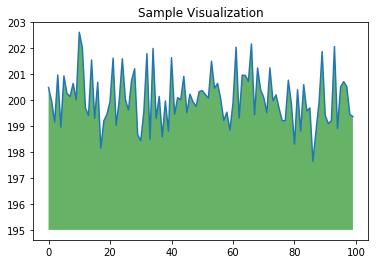

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
